# किस्किट की सहायता से प्रमात्रा अभिकलन एवम प्रमात्रा यंत्र अधिगम
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Quantum Computing and Quantum Machine Learning with Qiskit

प्रमात्रा अभिकलन क्या है और इसका उपयोग यंत्र अधिगम में कैसे किया जा सकता है? जानकारी के पहाड़ों में अत्यंत जटिल प्रतिरूप खोजने का तरीका अब प्रमात्रा यंत्र अधिगम नामक क्षेत्र का उद्देश्य है।

यह क्षेत्र मेरे अध्ययन के दो सबसे पसंदीदा क्षेत्रों को मिलाता है: अभिकलन और भौतिकी, और यहां मैं अध्ययन के इस क्षेत्र को अधिक से अधिक लोगों द्वारा बेहतर रूप से ज्ञात करने का प्रयास करता हूं।

हम पायथन और किस्किट का उपयोग करेंगे।


-------------------------------------------------------------------------------------
\\




What is quantum computing and how can it be used in machine learning, the method of finding extremely complex patterns in the mountains of information is now the aim of a field called quantum machine learning.

This field combines two of my favorite fields of study: computation and physics, and here I try to make this field of study better known by as many people as possible.

We will be using Python and Qiskit.



प्रमात्रा यांत्रिकी और प्रमात्रा अभिकलन के पीछे का विचार तीन अवधारणाओं पर आधारित है:

१. अवस्था का अध्यारोपण: क्यूबिट न तो $|0\rangle$ अवस्था में है,  और न ही $|1\rangle$ अवस्था में है , क्यूबिट मिश्रित अवस्था में है , जिसे अवस्था का अध्यारोपण कहा जाता है। इस बात को ध्यान में रखें कि यह धारणा कि यह एक ही समय में $|0\rangle$ और $|1\rangle$ अवस्था में है, गलत है। निकाय एक ऐसी अवस्था में है जो आधार अवस्था $|0\rangle$ और $|1\rangle$ से बनता है।


२. व्यतिकरण: अवस्थाओं को एक दूसरे  (या खुद )  पे परस्पर प्रभाव करवा कर  वांछित स्वरूप (वह जो हमारी समस्या का उत्तर रखता है) को मजबूत किया जाता है जबकि अन्य स्वरूप रद्द कर दिए जाते हैं।


३. संलिप्तता : अवस्थाओं के बीच एक अत्यंत मजबूत संबंध जो  चिरसम्मत भौतिकी में नहीं हो सकता। इसके कारण, दो कण जब वे एक दूसरे पर परस्पर प्रभाव डालते हैं, तो उसके बाद संलिप्त रहते हैं । इस संलिप्त  स्थिति का अर्थ है कि उनके अवस्थाओं को इस तरह से समूहीकृत किया जाता है कि उनका व्यक्तिगत रूप से प्रतिनिधित्व नहीं किया जा सकता है।


----------------------------------------------------------------------
Quantum Mechanics & Quantum Computing
The idea behind quantum computing is based in three concepts:

1. Superposition of states: the Qubit is neither in the $|0\rangle$ or $|1\rangle$ state but in a mixed state called superposition of states. Bare in mind that the notion that it is at the same time in the $|0\rangle$  and $|1\rangle$ state is wrong. The system is in a state that is formed from the basis states $|0\rangle$   and  $|1\rangle$ .

2. Interference: is the possibility of making states interact with one another (or with themselves) in such a way that the desired pattern (the one that holds the answer for our problem) is reinforced while the other patterns are cancelled out.
3. Entanglement: an extremely strong correlation between states that cannot happen in classical physics. Because of it, two particles when they interact with one another remain entangled after that. This entangled state means that their states are grouped in such a way that they cannot be represented individually.


### आवश्यक पायथन संकुल आयात करना
------------------------------------------------------------------
### Importing Necessary python packges

In [ ]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


#### पायथन और किस्किट रूपरचना

-------------------------------------------------
#### Python and Qiskit Setup

इस अध्ययन/पाठ्यक्रम में हमारा उद्देश्य प्रमात्रा अभिकलन के जरिए यंत्र अधिगम करना है। इसे सम्पादित करने के लिए प्रमात्रा परिपथ द्वारा अभ्यासों की एक श्रृंखला को हल किया जाएगा। किस्किट के अलावा, तीन पैकेज का भारी उपयोग किया जाएगा: पांडा, स्किकिट-लर्न और कुटिप। 

----------------------------------------------------------------------

Our objective in this course is doing machine learning through quantum computing. To achieve this a series of exercises will be solved by quantum circuits. Besides qiskit, three libraries will be heavily used: pandas, scikit-learn and qutip. 


In [ ]:
!pip install qutip -q
!pip install qiskit -q
!pip install qiskit[visualization] -q
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src -q

import numpy as np
np.set_printoptions(precision=3, suppress=True)
import qutip as qt 
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import sklearn as sk
import qiskit as qk

 ### प्रमात्रा द्वयंक

 #### सिद्धांत

 प्रमात्रा यांत्रिकी में हम एक या एक से अधिक कणों की अवस्थाओं को समझने में रुचि रखते हैं।  अवस्था  एक ऐसी चीज है जिसे बाद में एक पर्यवेक्षक  द्वारा मापा जाएगा। यह कण की गति, स्थिति, द्रव्यमान, प्रचक्रण, आदि हो सकता है ... इस अधिनियम से प्राप्त जानकारी का उपयोग "हमारी" दुनिया में किसी उद्देश्य के लिए किया जा सकता है।

 अभिकलन में हम कणों के बारे में बात करने के बजाय द्वयंक के बारे में बात करते हैं।

द्वयंक एक कण के लिए एक मॉडल है। एक कण की तरह इसकी अवस्थाएँ होती हैं। 

 माप पर आपको दो संभावित परिणामों में से एक देंगे। एक अतिसूक्ष्म परमाणु का चक्कर एक उदाहरण है (यह +१ या -१ हो सकता है)। एक अन्य उदाहरण एक फोटॉन का ध्रुवीकरण समक्षेत्र है |

-------------------------------------------------------
 ### Qubit

 #### Theory

 In quantum mechanics, we are interested in understanding the states of one or more particles. State is something that will be measured later by an observer. It can be the particle's speed, position, mass, spin, etc... The information obtained from this act can be used for some purpose in "our" world.

 In computing, we talk about bits instead of particles.

Bits is a model for a particle. Like a particle it has states.

 On measurement , it will give you one of two possible outcomes. An example is the rotation of an electron (it can be +1 or -1). Another example is the polarization plane of a photon.




## **अभ्यास १  : एक प्रमात्रा द्वयंक बनाना**

इस उदाहरण में, हम एक प्रमात्रा द्वयंक बनाएंगे $|\psi_0⟩$, उसे $|0\rangle$ अवस्था में डालेंगे और उसे मापेंगे। 

हम गणितीय अभ्यावेदन के साथ भी काम कर रहे हैं। $|0⟩$ अवस्था एक सदिश  है, जिसका मान $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ है| इसी तरह $|1⟩$ का मान $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ है|


------------------------------------------------------------------
## **Ex. 1 : Creating a qubit**

In this example we will create a qubit $|\psi_0⟩$ 
, put it in the state $|0⟩$ and measure it.

We are also working with the mathematical respresentations. The state $|0⟩$ is a vector $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and the state $|1\rangle$ is also a vector, represented by $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ 

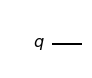

In [ ]:
# Remember that qiskit has to be already installed in the Python environment.
# Otherwise the import command will fail
import qiskit as qk

# A circuit composed of just one qubit
qc = qk.QuantumCircuit(1)
qc.draw('mpl')

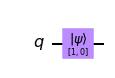

In [ ]:
import qiskit as qiskit

# A qubit initialized in the state |0>
qc = qk.QuantumCircuit(1)
qc.initialize([1,0])
qc.draw('mpl')

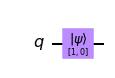

In [ ]:
import qiskit as qiskit

# A qubit initialized in the state |0>
qc = qk.QuantumCircuit(1)
qc.initialize([1,0])
qc.draw('mpl')

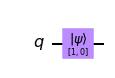

In [ ]:
import qiskit as qiskit

# A qubit initialized in the state |0>
qc = qk.QuantumCircuit(1)
qc.initialize([1,0])
qc.draw('mpl')

In [ ]:
import qiskit as qk

qc = qk.QuantumCircuit(1)
qc.initialize([1,0],0)
qc.measure_all()

# Let's choose the statevector simulator from the Aer backend
backend = qk.Aer.get_backend('statevector_simulator')

# And execute the circuit qc in the simulator backend 
#  getting as final result the counts from 1.000 measures
#  of the qubit state
result = qk.execute(qc, backend, shots=1000).result().get_counts()
result

{'0': 1000}

प्रमात्रा अभिकलन एक संभाव्य गणना पद्धति है| प्रमात्रा परिपथ चलाने के लिए, हमें बैकएंड चुनना होगा। बैकएंड स्थानीय अनुकारक या वास्तविक प्रमात्रा अभिकलित्र हो सकता है।


--------------------------------------------------------------------

Quantum Computing is a probabilistic computation method. To run a quantum circuit, we must chose a backend. The backend can be local simulator, or a real quantum computer.


अब, हम प्रमात्रा परिपथ  को १000 बार चलाना चाहते हैं। नीचे दिया गया रेखाचित्र परिणामों का एक आयत चित्र प्रस्तुत करता है

--------------------------------------------------------------
Now, we want to run the quantum circuit 1000 times. The graph below presents a histogram of the results

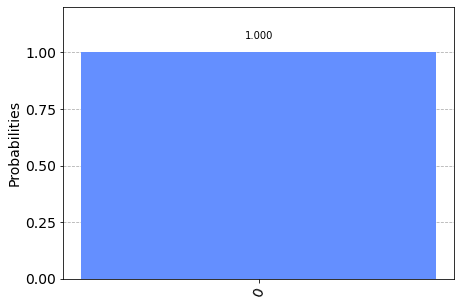

In [ ]:
import qiskit as qk

qc = qk.QuantumCircuit(1)
qc.initialize([1,0],0)
qc.measure_all()
backend = qk.Aer.get_backend('statevector_simulator')
result = qk.execute(qc, backend, shots=1000).result().get_counts()

qk.visualization.plot_histogram(result)

प्रमात्रा परिपथ बनाने का दूसरा तरीका नीचे प्रस्तुत किया गया है। इसमें, हम प्रमात्रा द्वयंक,  द्वयंक बनाते हैं और माप के परिणाम द्वयंक में संग्रहीत होते हैं।



-------------------------------------------------------
Another way of creating the quantum circuit is presented below. In it, we create quantum registers (qubits), classical registers (bits) and the results from the qubit measurement are stored in the classical register (the bit).

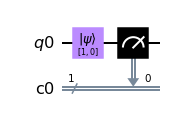

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([1,0],0)
qc.measure(0,0)
qc.draw('mpl')

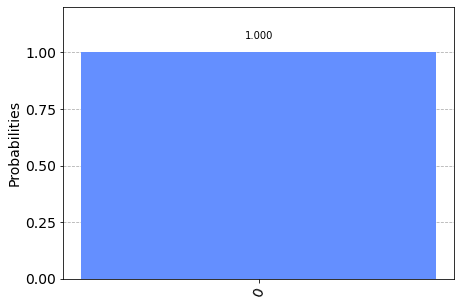

In [ ]:
backend = qk.Aer.get_backend('statevector_simulator')
result = qk.execute(qc, backend, shots=1000).result().get_counts()

qk.visualization.plot_histogram(result)

## **अभ्यास २ : एक परिपथ  बनाएं जो एक प्रमात्रा द्वयंक $|0⟩$ प्राप्त करता है और इसे $|1⟩$ स्थिति में रखता है**

याद रखें कि अवस्था $|0⟩$ और $|1⟩$ को सदिश द्वारा भी दर्शाया जा सकता है , $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ तथा $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$

हम $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ सदिश को सर्किट में रखना चाहते हैं और इस $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ सदिश को वापस पाना चाहते हैं|

गणितीय दृष्टिकोण से, हम एक और आव्यूह $X$ चाहते हैं, जिसे $|0⟩$ से गुणा करने पर परिणामस्वरूप $|1⟩$ मिलता है।
वह आव्यूह है:

$X = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

प्रमात्रा परिपथ परिप्रेक्ष्य से, एक आव्यूह जो संचालित और संशोधित करता है उसे गेट/तर्कद्वार कहा जाता है। 
नॉट गेट 

--------------------------------------------------------------

## **Ex.2: Create a circuit which receives a qubit in the state $|0⟩$  and puts it in the state $|1⟩$.**

Remember that the states $|0\rangle$ and $|1\rangle$ can be represented as $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$? 
We want in this exercise is a way of putting a matrix $\begin{bmatrix} 1 \\ 0 \end{bmatrix}$ in the circuit and getting back the matrix $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$. 

From a purely mathematical perspective what we want is another matrix $X$ which when multilied by $|0\rangle$ gives as a result $|1\rangle$.
Or in other words $|1\rangle = X |0⟩$. Which matrix is that?

The answer is $X = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$.

From a quantum circuit persepective, a matrix that operates in a qubit and modifies it is called a gate. The $X$ matrix depicted here represent the $NOT$ gate

In [ ]:
import numpy as np
v0 = np.array([[1],[0]]);v0

array([[1],
       [0]])

In [ ]:
v1 = np.array([[0],[1]]); v1

array([[0],
       [1]])

In [ ]:
X = np.array([[0,1],[1,0]]); X

array([[0, 1],
       [1, 0]])

In [ ]:
X.dot(v0)

array([[0],
       [1]])

In [ ]:
X.dot(v1)

array([[1],
       [0]])

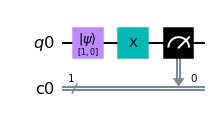

In [ ]:
import qiskit as qk
qr = qk.QuantumRegister(1,"q0")
cr = qk.ClassicalRegister(1,"c0")
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([1,0],0)
qc.x(0)
qc.measure(qr[0], cr[0])
qc.draw('mpl')

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, simulator, shots=1000).result().get_counts()
results

{'1': 1000}

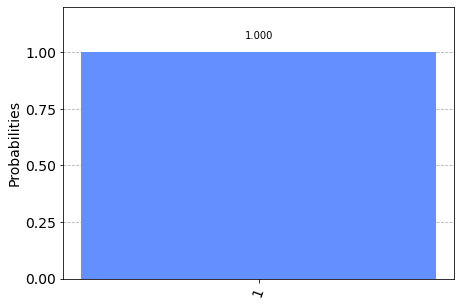

In [ ]:
qk.visualization.plot_histogram(results)

एक्स संकारक यदि दो बार लागू किया जाता है, तो यह परिणाम को फिर से उलट देगा।
आव्यूह के दृष्टिकोण से, इसका अर्थ है
$X⋅X⋅|0⟩ = |0⟩$ या $X^2 ⋅ |0⟩ = |0⟩$.
दूसरे शब्दों में $X^2 = I$. 
जहाँ X को पहचान संकारक कहा जाता है




--------------------------------------------------------------------


Note that the $X$ operator if applied twice in a qubit will reverse the result again. From a matrix perspective, it means $X⋅X⋅|0⟩ = |0⟩$ or $X^2 ⋅ |0⟩ = |0⟩$. In other words $X^2 = I$ where $I$ is called Idenity Matrix

In [ ]:
import numpy as np
# Notice that we are creating the v0 matrix using the transpose operation
v0 = np.array([[1,0]]).T; v0

array([[1],
       [0]])

In [ ]:
# Here it is created again de X matrix 
X = np.array([[0,1],[1,0]]); X

array([[0, 1],
       [1, 0]])

In [ ]:
# Multiplying v0 by the X matrix twice you get again v0
X.dot(X).dot(v0)

array([[1],
       [0]])

In [ ]:
# Multiplying the X matrix by itself you get the Identity matrix
X.dot(X)

array([[1, 0],
       [0, 1]])

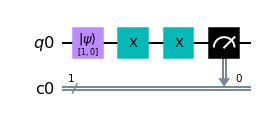

In [ ]:
import qiskit as qk
qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr, cr)
qc.initialize([1,0],0)
qc.x(0)
qc.x(0)
qc.measure(qr[0],cr[0])
qc.draw('mpl')

In [ ]:
# The result of 1000 measures of the qubit above gives the |0> state as result
#  in all measures
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=1000).result().get_counts()
results

{'0': 1000}

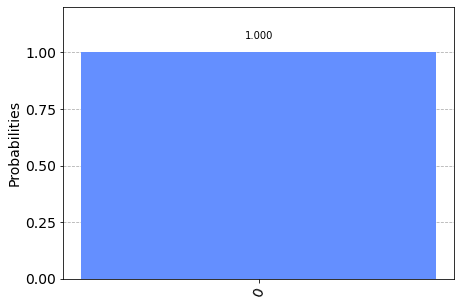

In [ ]:
qk.visualization.plot_histogram(results)


## **अभ्यास ३ : $|\psi\rangle = \frac{1}{\sqrt{2}} |0\rangle +  \frac{1}{\sqrt{2}} |1\rangle$ अवस्था में एक प्रमात्रा द्वयंक शुरू करें और परिणाम प्रस्तुत करें**



जब आप एक प्रमात्रा द्वयंक  को नहीं देख रहे हैं, तो यह एक सिक्के की तरह है जो अभी भी घूम रहा है। प्रमात्रा द्वयंक की स्थिति को $|\psi\rangle = a|0\rangle + b|1\rangle$ द्वारा दर्शाया जा सकता है, जहां $|a|^2 + |b|^2 = 1$ , एवं $ a $ , $b$ संबंधित आधार अवस्था $|0\rangle$, $|1\rangle$ को मापने की संभावनाएं हैं| चूँकि $a^2 = \frac{1}{2}$, $|0\rangle$ मापने की प्रायिकता 50% है, इसी तरह $|1\rangle$ के मापने की प्रायिकता भी 50% है.
इसलिए इस उदाहरण में, यदि हम $10$ माप निष्पादित करते हैं, तो हम उम्मीद करते हैं कि लगभग $5$ माप $|0⟩$ में और $5$ माप $|1⟩$ आधार अवस्था में दिखाई देंगे। नीचे दिया गया परिपथ इस प्रयोग को दर्शाता है



----------------------------------------------------------------

## **Ex.3: Initialize a qubit in the state $|ψ⟩ = \frac{1}{\sqrt{2}} |0⟩ + \frac{1}{\sqrt{2}} |1⟩$ and present the results of $1.000$ measures.**

Remember that a qubit, when you're not looking at it, is like a coin that is still spinning. The state that this qubit it can be represented by $|\psi⟩ = a |0⟩ + b |1⟩$, with $|a|^2 + |b|^2 = 1 $, where $a$ and $b$ are the probabilities of measuring the associated base states $|0⟩$ and $|1⟩$ respectively. Since $a^2 = \frac{1}{2}$ the probability of measuring $|0⟩$ is $50\%$ and same for $|1⟩$. Therefore in this example, if we execute $10$ measurements, we expect to see approximately $5$ measures in $|0\rangle$ and $5$ measures in $|1⟩$ base state respectively. The circuit below depicts this experiment.

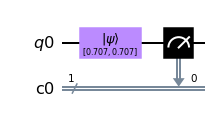

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([2**-0.5,2**-0.5],0)
qc.measure(qr[0],cr[0])
qc.draw('mpl')

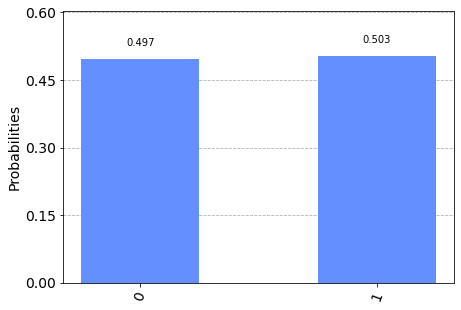

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

अवस्था $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$  में प्रमात्रा द्वयंक को प्रारंभिक स्थापन करने की प्रक्रिया को दूसरे गेट का उपयोग करके भी पूरा किया जा सकता था।
यह गेट $|0\rangle$ अवस्था में प्रमात्रा द्वयंक प्राप्त करेगा और $\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$ अवस्था का उत्पाद करेगा।
यह हैडामर्ड गेट है। $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$ , अगर हम गणना करें
$ H⋅ |0⟩ = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} ⋅\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}  = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$

-------------------------------------------------------------------------------------------

The process of initializing the qubit in the state $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$ could also have been accomplished using another gate. This gate would recieve a qubit in state $|0\rangle$ and output the state $\frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$.

That gate would be hadamard gate. Call it $H$, where $H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$. If we calculate:
$ H⋅ |0⟩ = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} ⋅\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}  = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1⟩$

आइए इस संक्रिया को numpy . में विस्तार  करें

---------------------------------------------------
Let's deploy this operation in numpy

In [ ]:

 import numpy as np
v0 = np.array([[1,0]]).T; v0

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/np.sqrt(2); H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
H.dot(v0)

array([[0.707],
       [0.707]])

.. और फिर प्रमात्रा परिपथ के माध्यम से, जैसा कि आप देख सकते हैं, माप का आयतचित्र समान है

------------------------------------------------------------------
.. and then through a quantum circuit. As you can see, the histogram of measurements is the same

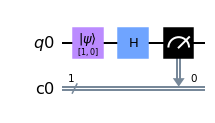

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.h(qr[0])
qc.measure(qr[0],cr[0])
qc.draw('mpl')

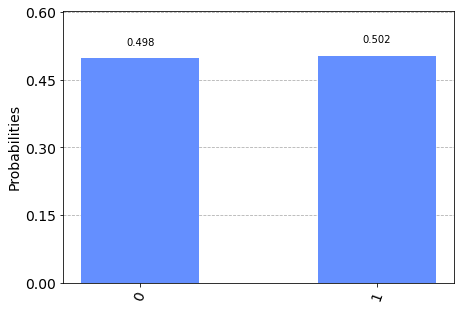

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc, simulator, shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

##**अभ्यास ४ : $|\psi\rangle = \frac{1}{\sqrt{2}} |0\rangle -  \frac{1}{\sqrt{2}} |1\rangle$ अवस्था में एक प्रमात्रा द्वयंक शुरू करें और परिणाम प्रस्तुत करें**

जब हमने अपनी प्रमात्रा अध्यारोपन स्थिति को परिभाषित किया और कहा कि संभाव्यता आयाम $a$ और $b$ भी एक काल्पनिक संख्या हो सकती है।
क्या होगा यदि $b$ एक ऋणात्मक संख्या हो| 
हमारे माप का परिणाम क्या होगा?

परिणाम पिछले अभ्यास के समान ही होगा, क्योंकि $|\frac{-1}{\sqrt{2}}|^2 = \frac{1}{2}$.
आइए हम एक प्रमात्रा परिपथ  बनाएं और पता करें

-------------------------------------------------------------------------

## **Ex.4 : Initialize a qubit in the state $|\psi⟩ = \frac{1}{\sqrt{2}} |0⟩ - \frac{1}{\sqrt{2}}|1⟩$ and present the result**

When we defined our qubit's superposition state and said that the probabilities amplitudes $a$ and $b$ could also be any complex number. What if $b$ is a negative number , lie $-1$? What would we measure?

The result would be same as well, because $|\frac{-1}{\sqrt{2}}|^2 = \frac{1}{2}$. Let us create a quantum circuit and find out.

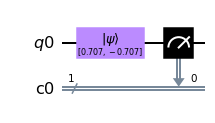

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([2**-0.5,-(2**-0.5)],0)
qc.measure(qr[0],cr[0])
qc.draw('mpl')

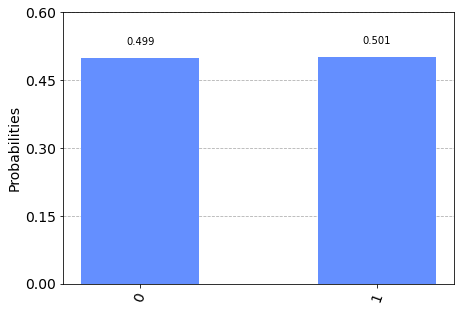

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

आइए एक और प्रयोग करें| हम अवस्था $|Ψ⟩ = \frac{1}{\sqrt{2}} |0⟩ - \frac{1}{\sqrt{2}}|1⟩$ में प्रमात्रा द्वयंक से शुरू करते हैं। हम इसे एक $H$ गेट से गुजारते हैं और फिर इसे मापते हैं।
परिणाम क्या होगा?

--------------------------------------------------------------------
Let's make another experiment. We start with the qubit in the state $|Ψ⟩ = \frac{1}{\sqrt{2}} |0⟩ - \frac{1}{\sqrt{2}}|1⟩$. We pass it through an $H$ gate and then we measure it. 
What's going to be the result

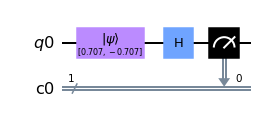

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([2**-0.5,-(2**-0.5)],0)
qc.h(0)
qc.measure(qr[0],cr[0])
qc.draw('mpl')

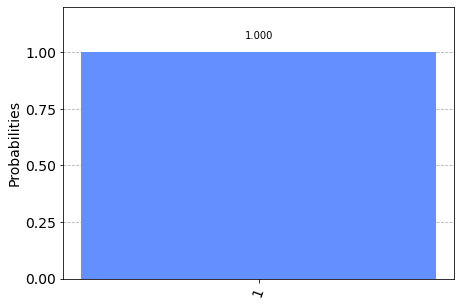

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

परिणामी अवस्था $|Ψ⟩ = |1⟩$ है|

इसका मतलब यह है कि यदि हम अवस्था   $|1⟩$  में प्रमात्रा द्वयंक से शुरू करते हैं और इसे $H$ गेट से दो बार गुजारते करते हैं, तो हमें $|1⟩$ वापस मिलेगा।
आइए अपनी समझ को जांचने के लिए एक और परिपथ बनाएं


-----------------------------------------------------------------
The resulting state is $|Ψ⟩ = |1⟩$. This means that if we start with the qubit in the state $|1⟩$ and pass it through an $H$ gate twice, we will get back to $|1⟩$. Let's create another circuit to check our understanding.

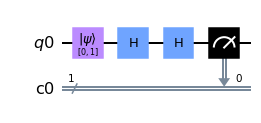

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(1,'q0')
cr = qk.ClassicalRegister(1,'c0')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([0,1],0)
qc.h(0)
qc.h(0)
qc.measure(qr[0],cr[0])
qc.draw('mpl')

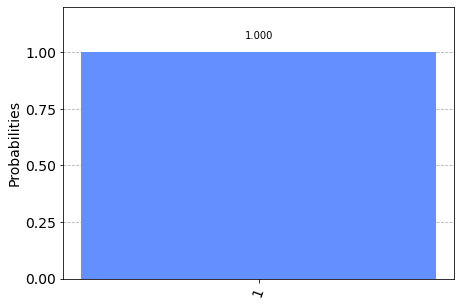

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

आइए हम इसे आव्यूह का उपयोग करके जांचें

------------------------------------------------
Let us check the same with matrices using numpy

In [ ]:
import numpy as np

# First let's start with the qubit in the state |psi> = (|0> - |1>)/sqrt(2)
psi = np.array([[1,-1]]).T/(2**0.5); psi

array([[ 0.707],
       [-0.707]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5; H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
# Now let's pass the qubit Psi through an Hadamard gate. 
# The result is a qubit in the state |1>
H.dot(psi)

array([[0.],
       [1.]])

In [ ]:
# Let's start with a qubit in the state |1>, pass it through a
#  a hadamard gate twice and check the result
v0 = np.array([[0,1]]).T; v0

array([[0],
       [1]])

In [ ]:
H.dot(H).dot(v0)

array([[-0.],
       [ 1.]])

In [ ]:
# This means that if we multiply the H gate by itself the result 
#  will be an Identity matrix. Let's check it.
H.dot(H)

array([[ 1., -0.],
       [-0.,  1.]])

##**अभ्यास ५ :  दो प्रमात्रा द्वयंक से शुरू करें, प्रत्येक $|0\rangle$ अवस्था में और परिणामों को मापें। मैट्रिसेस संक्रियाओं के माध्यम से उत्तर की जाँच करें।**


-------------------------------------------------
##**Ex.5: Start with two qubits, each one in the state $|0⟩$ and measure the results. Check the answer through matrices operation**

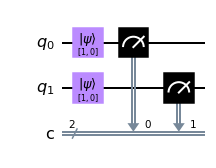

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.measure(qr,cr)
qc.draw('mpl')

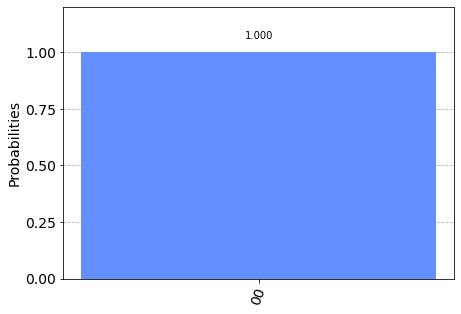

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

ध्यान दें कि परिणाम अब अवस्था  $|00\rangle$ है| इसका मतलब यह है कि दो प्रमात्रा द्वयंक  अब एक मिश्रित अवस्था में हैं| इस राज्य का प्रतिनिधित्व है:
$|\psi⟩ = a |00⟩ + b |01⟩ + c |10⟩ + d |11⟩$ जहां $|a|^2 + |b|^2 + |c|^2 + |d|^2$  है
पहली प्रमात्रा द्वयंक को $|\psi_1⟩   = a_1 |0⟩ + b_1|1⟩$ द्वारा प्रस्तुत किया जा सकता है|  दूसरा प्रमात्रा द्वयंक $|\psi_2⟩   = a_2 |0⟩ + b_2|1⟩$ |

परिपथ में परिणामी प्रमात्रा द्वयंक, प्रदिश गुणनफल नामक एक संक्रिया का परिणाम होगा।
इस संक्रिया को $|\psi_1⟩$ और $|\psi_2⟩$ प्रमात्रा द्वयंक के साथ निष्पादित किया जाएगा|
इसे $|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2⟩$ द्वारा दर्शाया जाता है

इस संक्रिया के पीछे बीजगणित है:
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2⟩$
$(a_1|0⟩ + b_1|1⟩) ⊗ (a_2 |0⟩ + b_2 |1⟩)$
$=a_1 a_2 |0⟩|0⟩ + a_1 b_2 |0⟩|1⟩ + b_1 a_2 |1⟩|0⟩ + b_1 b_2 |1⟩|1⟩$
$ = a_1 a_2 |00⟩ + a_1b_2|01⟩ + b_1 a_2 |10⟩ + b_1 b_2 |11⟩$

आव्यूह के दृष्टिकोण से
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2⟩$

$= \begin{bmatrix} a_1 \\ b_1 \end{bmatrix} \otimes \begin{bmatrix} a_2 \\ b_2 \end{bmatrix} $
$ = \begin{bmatrix} a_1 a_2 \\ a_1 b_2 \\ b_1 a_2 \\ b_1 a_2 \end{bmatrix}$

इस उदाहरण में संख्याओं का उपयोग:
$(1|0⟩ + 0|1⟩) ⊗ (1 |0⟩ + 0 |1⟩)$
$=1 |0⟩|0⟩ + 0 |0⟩|1⟩ + 0 |1⟩|0⟩ + 0 |1⟩|1⟩$
$ = 1 |00⟩ + 0|01⟩ + 0 |10⟩ + 0 |11⟩$

समतुल्य आव्यूह संचालन है:
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2 ⟩ = \begin {bmatrix} 1 \\ 0 \end{bmatrix} ⊗ \begin {bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$

यह सब पाइथन के साथ जांचें

-------------------------------------------

Notice that the result now is the state $|00⟩$. This means that the two qubits are now in a composite state. The representation of this state is :    
$|\psi⟩ = a |00⟩ + b |01⟩ + c |10⟩ + d |11⟩$ where $|a|^2 + |b|^2 + |c|^2 + |d|^2$ 

The first qubit can be represented by $|\psi_1⟩   = a_1 |0⟩ + b_1|1⟩$. The second qubit by $|\psi_2⟩   = a_2 |0⟩ + b_2|1⟩$. The resulting qubit in the circuit input will be the result of an operation called tensor product.

This operation will be executed with the qubits $|\psi_1⟩$ and $|\psi_2⟩$. It is represented by:
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2⟩$

The algebra behind this operation is this:
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2⟩$
$(a_1|0⟩ + b_1|1⟩) ⊗ (a_2 |0⟩ + b_2 |1⟩)$
$=a_1 a_2 |0⟩|0⟩ + a_1 b_2 |0⟩|1⟩ + b_1 a_2 |1⟩|0⟩ + b_1 b_2 |1⟩|1⟩$
$ = a_1 a_2 |00⟩ + a_1b_2|01⟩ + b_1 a_2 |10⟩ + b_1 b_2 |11⟩$

From a matrix pov:
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2⟩$

$= \begin{bmatrix} a_1 \\ b_1 \end{bmatrix} \otimes \begin{bmatrix} a_2 \\ b_2 \end{bmatrix} $
$ = \begin{bmatrix} a_1 a_2 \\ a_1 b_2 \\ b_1 a_2 \\ b_1 a_2 \end{bmatrix}$

Using numbers in this example:
$(1|0⟩ + 0|1⟩) ⊗ (1 |0⟩ + 0 |1⟩)$
$=1 |0⟩|0⟩ + 0 |0⟩|1⟩ + 0 |1⟩|0⟩ + 0 |1⟩|1⟩$
$ = 1 |00⟩ + 0|01⟩ + 0 |10⟩ + 0 |11⟩$

And the equivalent matrix operation is:
$|\psi_3⟩ = |\psi_1⟩ \otimes |\psi_2 ⟩ = \begin {bmatrix} 1 \\ 0 \end{bmatrix} ⊗ \begin {bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$

Check this all with python

In [ ]:
import numpy as np
psi1 = np.array([[1,0]]).T; psi1

array([[1],
       [0]])

In [ ]:
psi2 = np.array([[1,0]]).T; psi2

array([[1],
       [0]])

In [ ]:
# In numpy the tensor product is calculated with the function kron
np.kron(psi1,psi2)

array([[1],
       [0],
       [0],
       [0]])


##**अभ्यास ६ : मान लीजिए $|+⟩ = \frac{1}{\sqrt{2}}|0⟩ + \frac{1}{\sqrt{2}}|1⟩$ है| दो प्रमात्रा द्वयंक $|+\rangle$  अवस्था मे प्रारंभ करें, परिणामों को मापें और उन्हें आव्यूह संचालन के माध्यम से जांचें।** 



अवस्था $|+⟩$ में एक प्रमात्रा द्वयंक लगाने के लिए, हम या तो इसमें प्रमात्रा द्वयंक को प्रारंभ कर सकते हैं या हम अवस्था $|0⟩$ में प्रमात्रा द्वयंक को प्रारंभ कर सकते हैं और फिर इसे $H$ गेट से पारित कर सकते हैं।
आइए दूसरी प्रक्रिया का उपयोग करें




------------------------------------------------------------------
##**Ex.6: Suppose $|+⟩ = \frac{1}{\sqrt{2}}|0⟩ + \frac{1}{\sqrt{2}}|1⟩$. Start two qubits in the state $|+⟩$, measure the results and check them thorugh matrix operations**

To put a qubit in the state $|+⟩$ we can either initialize the qubit in it or we can initialize the qubit in the state $|0⟩$ and pass it through a Hadamard gate. Let's use this second procedure.

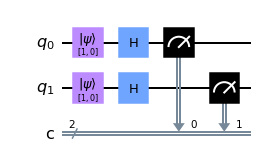

In [ ]:
import qiskit as qk

qr = qk.QuantumRegister(2,'q')
cr = qk.ClassicalRegister(2,'c')
qc = qk.QuantumCircuit(qr,cr)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.h(0)
qc.h(1)
qc.measure(qr,cr)
qc.draw('mpl')

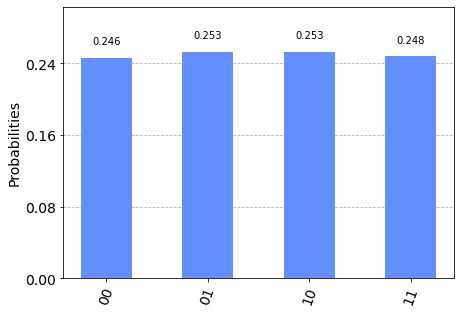

In [ ]:
simulator = qk.Aer.get_backend('statevector_simulator')
results = qk.execute(qc,simulator,shots=10000).result().get_counts()
qk.visualization.plot_histogram(results)

परिणामी अवस्था $|\psi⟩ = \frac{1}{2}|00⟩ + \frac{1}{2}|01⟩ + \frac{1}{2}|10⟩ + \frac{1}{2}|11⟩$ है. 
ऐसा इसलिए हुआ क्योंकि प्रत्येक अवस्था $25\%$ समय परिणाम में दिखाई दी।
आइए आव्यूह संचालन के माध्यम से जांचें

----------------------------------------------
It seems the resulting state is $|\psi⟩ = \frac{1}{2}|00⟩ + \frac{1}{2}|01⟩ + \frac{1}{2}|10⟩ + \frac{1}{2}|11⟩$. This happens because each state appears in the result $25\%$ of time $(\frac{1}{2}^2 = \frac{1}{4})$. Let's compare this idea through matrix operations

In [ ]:
import numpy as np
psi1 = np.array([[1,0]]).T;psi1

array([[1],
       [0]])

In [ ]:
psi2 = np.array([[1,0]]).T;psi2

array([[1],
       [0]])

In [ ]:
H = np.array([[1,1],[1,-1]])/2**0.5;H

array([[ 0.707,  0.707],
       [ 0.707, -0.707]])

In [ ]:
# When we want to combine two vector states or gate matrices we tensor product them.
psi3 = np.kron(psi1,psi2);psi3

array([[1],
       [0],
       [0],
       [0]])

In [ ]:
H2 = np.kron(H,H);H2

array([[ 0.5,  0.5,  0.5,  0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

In [ ]:
# When we want to pass a vetor through a gate we calculate the dot product
#  of the total gate matrix with the total vector.
# As we have predicted, the resulting vector state has a=b=c=d=1/2
psi4 = H2.dot(psi3); psi4

array([[0.5],
       [0.5],
       [0.5],
       [0.5]])